In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ca34fe1839d54088929af0c8e5b2ad67 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MWzWaEyX1u7HwRK3EX0B1Hndj0vSbHIkrZe0XUY8-a0A',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_ca34fe1839d54088929af0c8e5b2ad67.get_object(Bucket='employeepromotion-donotdelete-pr-w9wyg26tuo6rkf',Key='emp_promotion.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [4]:
# Data is imbalanced

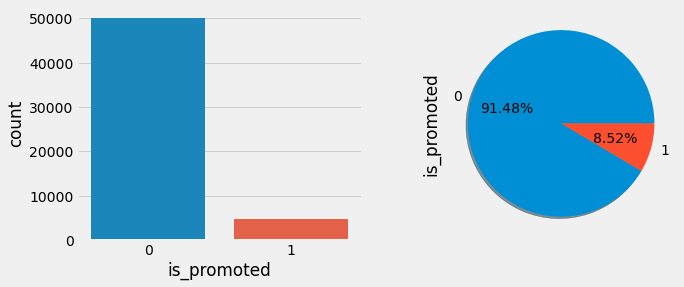

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.show()

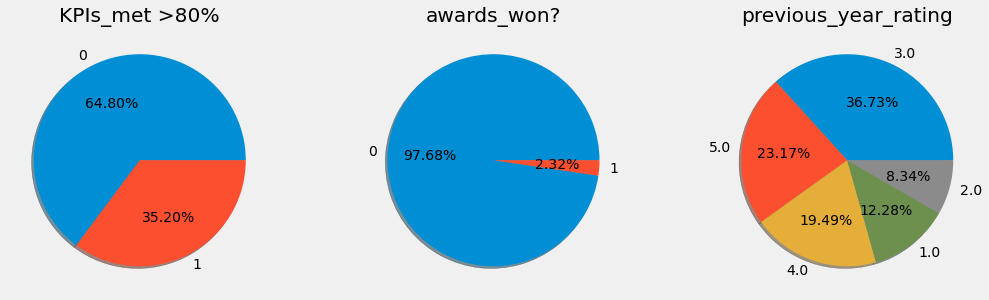

In [6]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie',autopct='%.2f%%',shadow=True)
plt.show()

In [7]:
# length of services column has outliers

<AxesSubplot:xlabel='avg_training_score'>

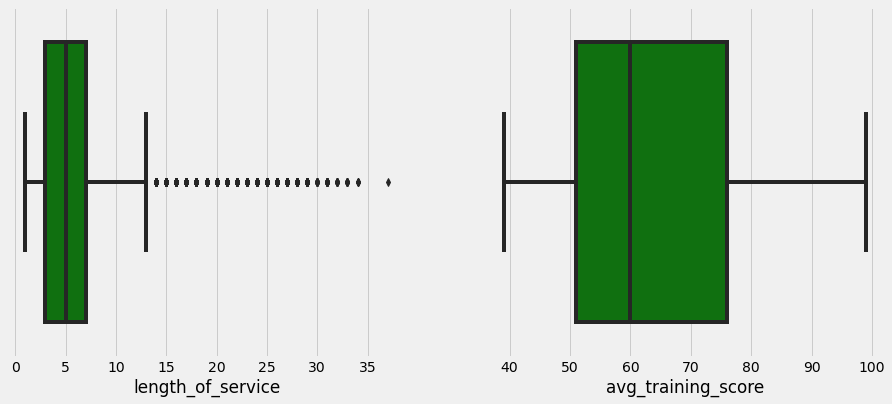

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(df['avg_training_score'],color='g')


<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

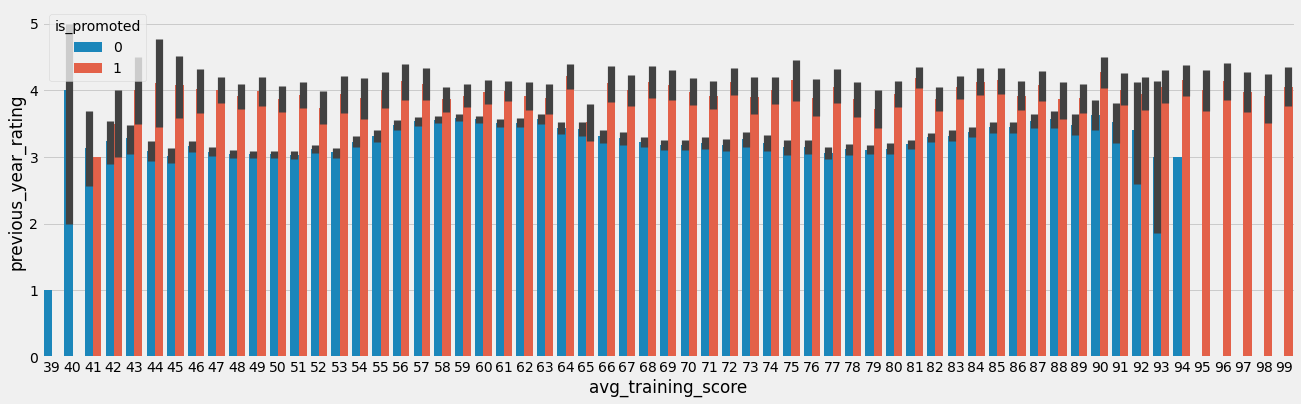

In [9]:
plt.figure(figsize=(20,6))
sns.barplot(df['avg_training_score'],df['previous_year_rating'],df['is_promoted'])

In [10]:
# Descriptive analysis

In [11]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [12]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [13]:
df=df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)
df.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0


In [14]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
# Replacing nan with mode


In [16]:
print(df['education'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [17]:
mv=df[df["education"].isnull()].index.tolist()
df.drop(mv, axis=0, inplace=True)

In [18]:
df.isnull().sum()

department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
# Replacing nan with mode

In [20]:
print(df['previous_year_rating'].value_counts())


3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64


In [21]:
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

In [22]:
# finding the employee who got promoted even in poor performance.

In [23]:
negetive =df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

In [24]:
negetive

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [25]:
# Removing negetive data

In [26]:
df.drop(index=[31860,51374],inplace=True)

In [27]:
# Handling outliers

In [28]:
q1=np.quantile(df['length_of_service'],0.25)
q3=np.quantile(df['length_of_service'],0.75)

IQR=q3-q1

upperBound=(1.5*IQR)+q3
lowerBound=(1.5*IQR)-q1

print('q1 :' ,q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upperBound)
print('Lower Bound :',lowerBound)
print ('skewed df : ',len(df[df[ 'length_of_service' ]>upperBound]))


q1 : 3.0
q3 : 8.0
IQR : 5.0
Upper Bound : 15.5
Lower Bound : 4.5
skewed df :  2298


In [29]:
# Here outliers  can't be removed .Employee with higher length of services has higher promotion percentage so,capping is done on this feature

In [30]:
pd.crosstab([df['length_of_service']>upperBound],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,45716,4383
True,2137,161


In [31]:
# capping

In [32]:
df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

In [33]:
df[ 'education' ].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       False
67       False
68       False
69       False
70       F

In [34]:
# Handling categorical values
# Feature mapping is done on education column

In [35]:
df['education']=df['education'].replace(("Below Secondary", "Bachelor's","Master's & above"),(1,2,3))

In [36]:
df['education']

0        3
1        2
2        2
3        2
4        2
5        2
6        2
7        3
8        2
9        3
11       2
12       2
13       3
14       3
15       2
16       2
17       2
18       2
19       2
20       2
22       2
23       2
24       3
25       2
26       2
27       2
28       2
29       2
30       2
31       2
33       2
34       2
35       2
36       2
37       2
38       3
39       2
40       2
41       2
42       2
44       2
45       2
46       3
47       2
48       2
49       3
50       2
51       2
52       2
53       2
54       2
55       2
56       2
57       3
58       2
59       2
60       3
61       2
62       2
63       3
64       2
65       3
66       2
67       2
68       2
69       2
70       2
71       3
72       3
73       2
74       2
75       3
76       2
77       2
78       2
79       2
80       2
81       3
83       2
84       2
85       3
86       2
88       3
89       2
91       2
92       3
93       3
94       2
95       2
96       2
97       2

In [37]:
lb=LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [38]:
# Handling imbalanced data
# Splitting data and resampling it

In [39]:
x=df.drop('is_promoted',axis=1)
y=df['is_promoted']
print(x.shape)
print(y.shape)

(52397, 9)
(52397,)


In [40]:
#pip install imblearn

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [42]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (36677, 9)
Shape of y_train (36677,)
Shape of x_test (15720, 9)
Shape of y_test (15720,)


In [43]:
# Model Building

In [44]:
# Decision Tree

In [45]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [46]:
# Random Forest

In [47]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [48]:
# KNN model

In [49]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [50]:
# Xg boost

In [51]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [52]:
# Compare the model

In [53]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [54]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[13567   801]
 [  779   573]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14368
           1       0.42      0.42      0.42      1352

    accuracy                           0.90     15720
   macro avg       0.68      0.68      0.68     15720
weighted avg       0.90      0.90      0.90     15720

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[14123   245]
 [  902   450]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14368
           1       0.65      0.33      0.44      1352

    accuracy                           0.93     15720
   macro avg       0.79      0.66      0.70     15720
weighted avg       0.91      0.93      0.92     15720

-----------------------------------------------

In [55]:
# Evaluating performance of the model and saving the model

In [56]:
# Random forest model is selected

In [57]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [58]:
cv=cross_val_score(rf,x,y,cv=5)

In [59]:
cv
np.mean(cv)

0.9277630797764195

In [60]:
pickle.dump(rf,open('model.pkl','wb'))

In [61]:
#!tar -zcvf rf model.pkl

In [62]:
#ls -1

In [63]:
!pip install ibm_watson_machine_learning


In [64]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"Q7V_YkwLv_ljzhDgzlg1cbRA5CDBB3H-2SaDW7-ba2FK"
    }
client = APIClient(wml_credentials)

In [65]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
089a5749-d807-4fb8-b7a7-2cb29642fe8a  Employeepromotion  2022-10-27T15:34:13.995Z
------------------------------------  -----------------  ------------------------


In [66]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [67]:
space_uid = guid_from_space_name(client, space_name='Employeepromotion')
print("Space UID = " + space_uid)

Space UID = 089a5749-d807-4fb8-b7a7-2cb29642fe8a


In [68]:
client.set.default_space(space_uid)

'SUCCESS'

In [69]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [70]:
import sklearn
sklearn.__version__

'1.0.2'

In [71]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [72]:
model_details = client.repository.store_model(model=rf,
                                              meta_props={client.repository.ModelMetaNames.NAME:"Employee_prediction",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                         },training_data=x_train,
                                              training_target=y_train)

In [73]:
model_id = client.repository.get_model_id(model_details)
model_id

'1111424c-18ec-4d33-9e01-f871e9e67b1f'

In [74]:
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"empdep", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: '1111424c-18ec-4d33-9e01-f871e9e67b1f' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='fa6160cb-d2ea-46cc-a24c-30f1f6135c61'
------------------------------------------------------------------------------------------------


